In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np 

In [15]:
df1 = pd.read_csv("../Data/train.csv", low_memory=False)
df1.drop(columns=['ID', 'Name', 'SSN'], inplace=True)
df1.loc[df1.Monthly_Balance == "__-333333333333333333333333333__", 'Monthly_Balance'] = None
df1.loc[df1.Amount_invested_monthly == "__10000__", 'Amount_invested_monthly'] = None

In [16]:
cat = df1.select_dtypes(include=["object"]).columns

features = [feature for feature in cat if df1[feature].str.contains('_').any()]
features.remove('Customer_ID')

for feature in features:
    df1[feature] = df1[feature].str.replace("_", "")


features = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
            'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly',
            'Monthly_Balance']

for feature in features:
    df1[feature] = pd.to_numeric(df1[feature]).astype('float')

In [17]:
df1.loc[df1.Credit_History_Age.notna(),
       'Credit_History_Age'] = df1['Credit_History_Age'].str.extractall('(\d+)').unstack().astype(float).multiply([12, 1]).sum(axis=1)
df1['Credit_History_Age'] = df1['Credit_History_Age'].astype(float)

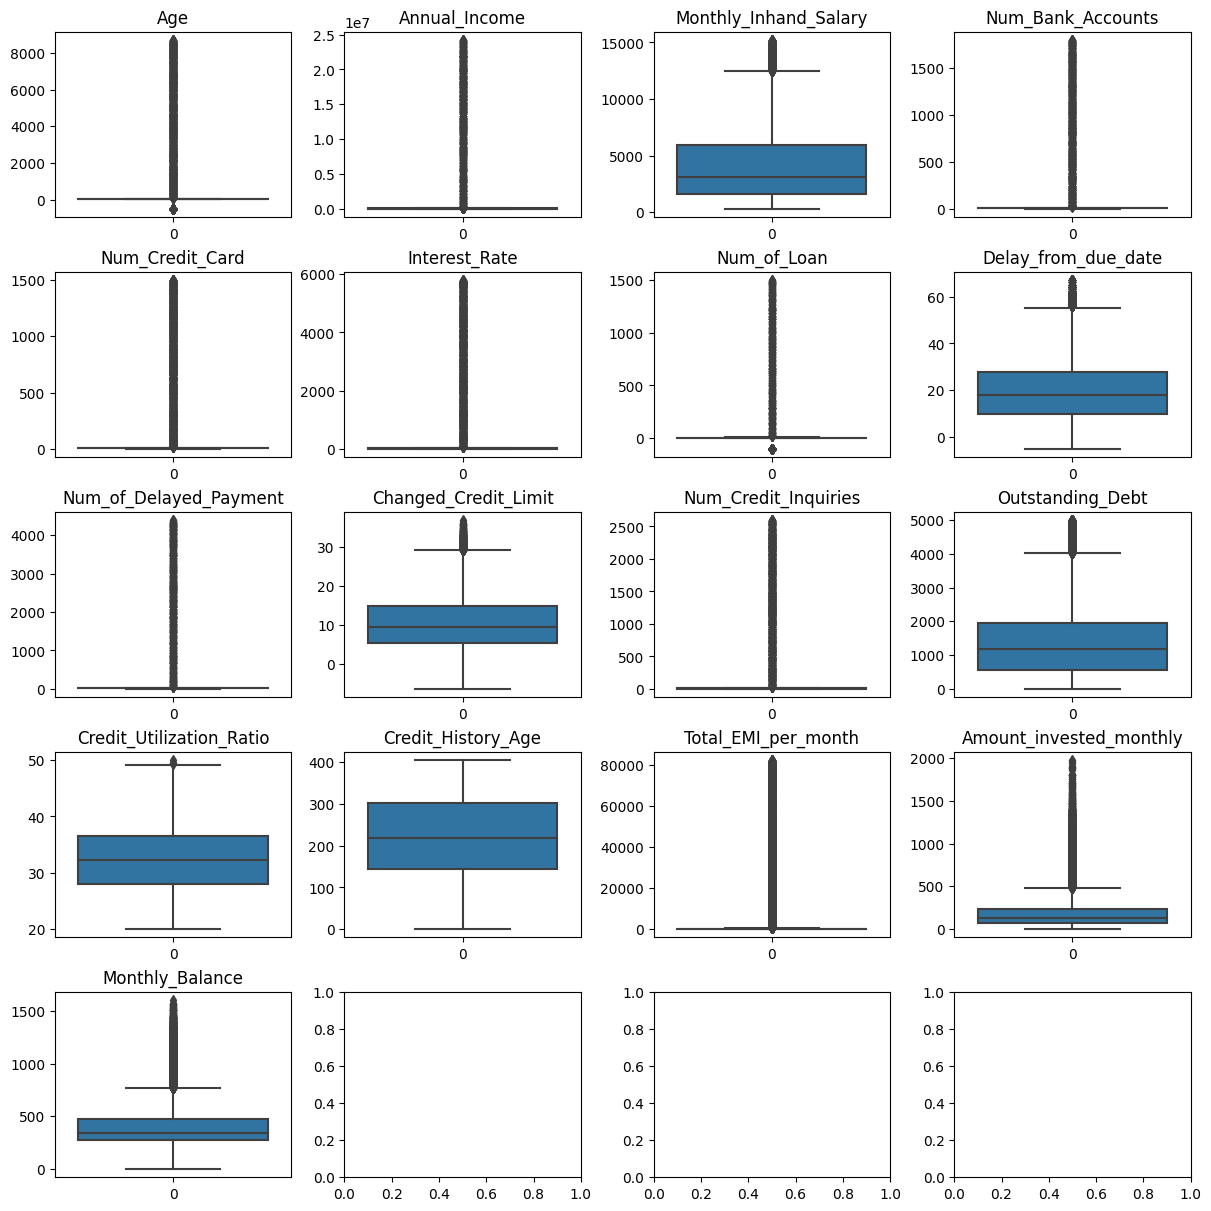

In [21]:
fig, axs = plt.subplots(5, 4, figsize=(12,12), constrained_layout=True)

num = df1.select_dtypes(include=["number"]).columns

for col, ax in zip(num, axs.flatten()):
    sns.boxplot(data=df1[col], ax=ax)
    ax.set_title(col)

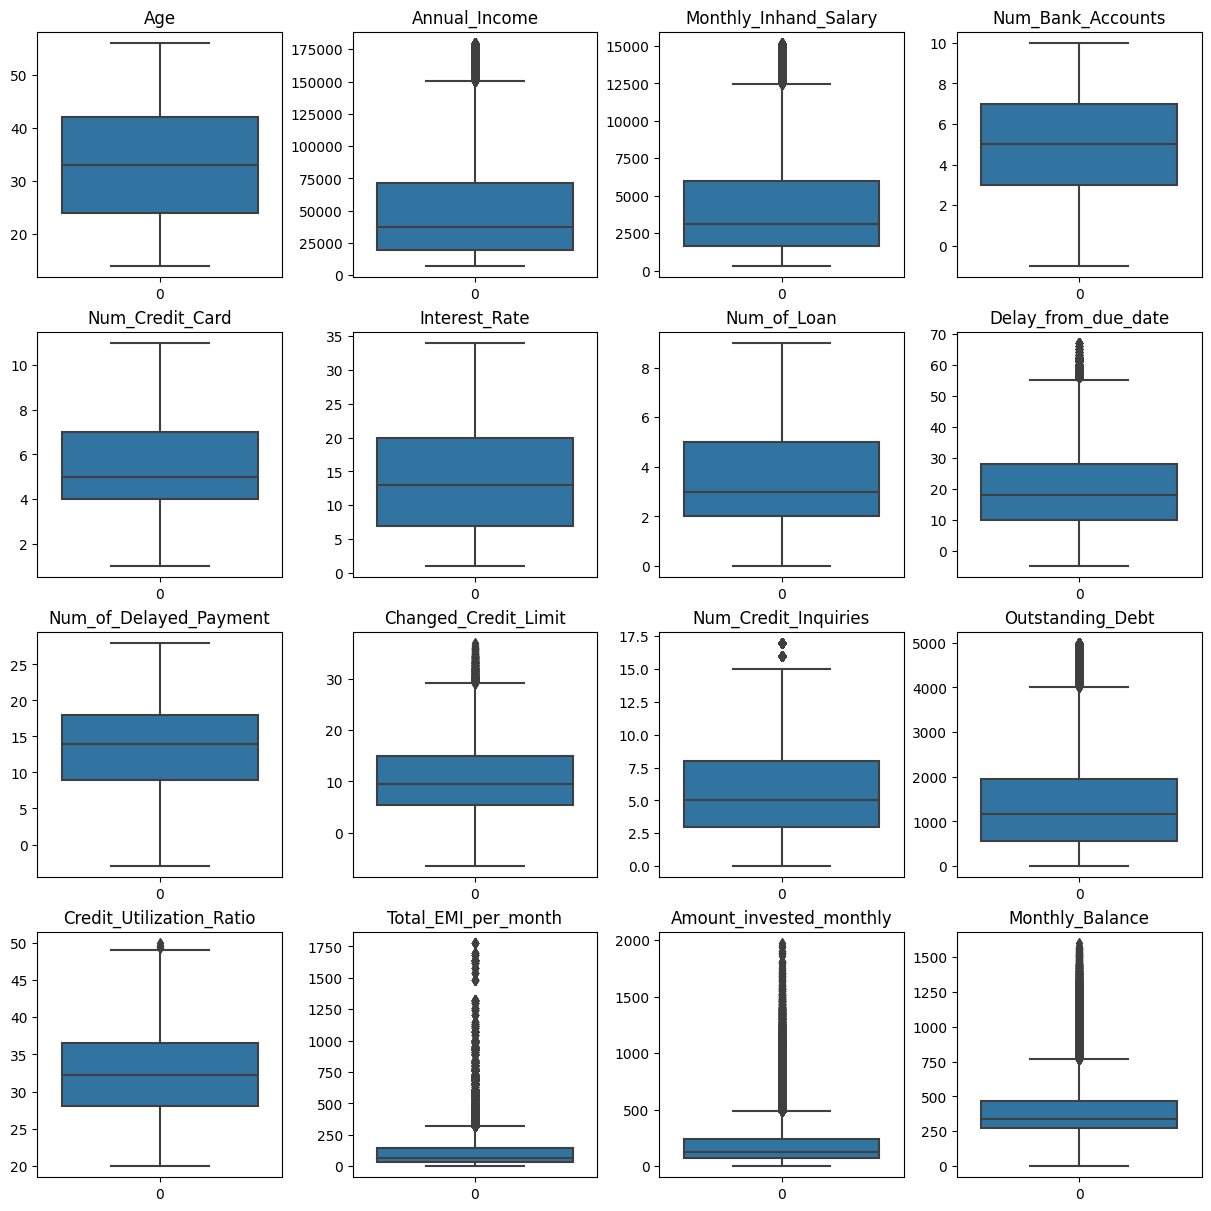

In [103]:
fig, axs = plt.subplots(4, 4, figsize=(12,12), constrained_layout=True)

for col, ax in zip(num, axs.flatten()):
    sns.boxplot(data=df[col], ax=ax)
    ax.set_title(col)